In [17]:
import numpy as np

In [18]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [19]:
def sigmoid_derivative(z):
    s=sigmoid(z)
    return s*(1-s)

In [25]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([[0],[1],[1],[0]])

In [26]:
np.random.seed(0)
#architecture :-
input_size = 2
hidden_size = 4 
output_size = 1
#wieghts and biases:-
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
lr = 0.5 #learning rate
epochs = 20000
m = X.shape[0]

In [27]:
for i in range(epochs):
    #-----forward prop-------
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)   
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    #---back prop---------
    dZ2 = A2 - Y    
    dW2 = (1/m)*np.dot(A1.T, dZ2)
    db2 = (1/m)*np.sum(dZ2, axis=0, keepdims=True)
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1*sigmoid_derivative(A1)    
    dW1 = (1/m)*np.dot(X.T, dZ1)
    db1 = (1/m)*np.sum(dZ1, axis=0, keepdims=True)

    #----update----
    W2 -= lr*dW2
    b2 -= lr*db2
    W1 -= lr*dW1
    b1 -= lr*db1

print("Final Predictions:")
pred = (A2 > 0.5).astype(int)
print(pred)

Final Predictions:
[[0]
 [1]
 [1]
 [0]]


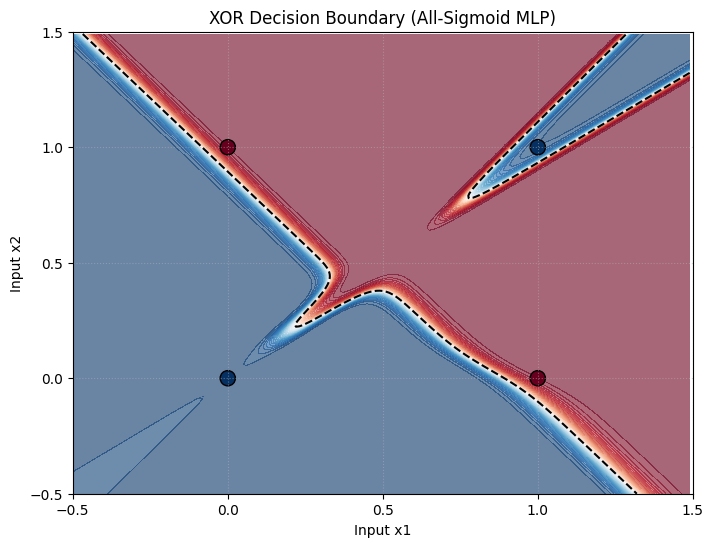

In [30]:
#######
###### USED GEMINI FOR THE BELOW PART ############
## was curious to see the actual desicion boudary we have got after training MLP

#######
import matplotlib.pyplot as plt

# --- Visualization Setup ---

# 1. Define the boundaries of the plot area
# We go slightly beyond 0 and 1 to see the context
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

# 2. Create a meshgrid (a fine grid of points across the area)
h = 0.01  # Step size for the grid resolution
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# 3. Flatten the grid points to feed into the network
# np.c_ stacks them into an (N, 2) array like our training data X
grid_points = np.c_[xx.ravel(), yy.ravel()]


# --- Forward Pass on Grid Points ---
# NOTE: We use the *exact same* forward logic and trained weights
Z1_grid = np.dot(grid_points, W1) + b1
A1_grid = sigmoid(Z1_grid) # Using sigmoid hidden layer as per last code

Z2_grid = np.dot(A1_grid, W2) + b2
A2_grid = sigmoid(Z2_grid) # Final probabilities for the grid

# 4. Reshape the predictions back into the shape of the grid mesh
Z_grid_reshaped = A2_grid.reshape(xx.shape)


# --- Plotting ---
plt.figure(figsize=(8, 6))

# A. Plot the contour surface representing the probabilities
# cmap='RdBu_r' makes 0 blue, 1 red, and 0.5 white/gray (the boundary)
plt.contourf(xx, yy, Z_grid_reshaped, levels=50, cmap='RdBu_r', alpha=0.6)

# B. Add a specific line for the exact 0.5 decision boundary
plt.contour(xx, yy, Z_grid_reshaped, levels=[0.5], colors='black', linestyles='dashed')

# C. Plot the original XOR data points on top
# Color them based on their actual target Y values
# Blue dots for 0 target, Red dots for 1 target
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten(), s=120, cmap='RdBu_r', edgecolors='k')

# Labels and formatting
plt.title("XOR Decision Boundary (All-Sigmoid MLP)")
plt.xlabel("Input x1")
plt.ylabel("Input x2")
# Set ticks to clearly show the 0 and 1 inputs
plt.xticks([-0.5, 0, 0.5, 1, 1.5])
plt.yticks([-0.5, 0, 0.5, 1, 1.5])
plt.grid(True, linestyle=':', alpha=0.5)

plt.show()